In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from kcm import *  

In [2]:
probs = np.array([]) #np.arange(0.2, .8, 0.2)
 
for prob in probs:
    print("Probability: {}".format(prob))
    east_kcm = EastKCM(prob, 50, 200, 50000)
    trajectory = east_kcm.gen_trajectory()
    draw_trajectory(trajectory)

This is what we want to see (also a reference for the parameter ranges)

![goal.png](./goal1.png)


Softening parameter, \epsilon: 0.0


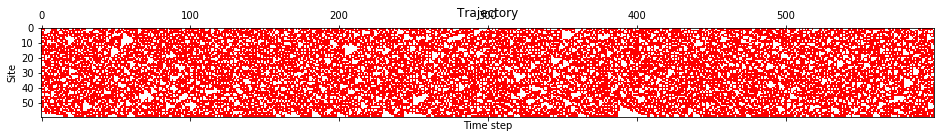

In [7]:
epsilons = np.array([0.]) #np.array([1.9e-4, 6.3e-3,1.9e-2])

for eps in epsilons:
    print("Softening parameter, \epsilon: {}".format(eps))
    fa_kcm = SoftenedFA(gamma=.25, s=-1, eps=eps, num_burnin_steps=0, num_sites=60, num_steps=600)
    trajectory = fa_kcm.gen_trajectory()
    draw_trajectory(trajectory)

In [4]:
temperatures = np.array([1., 10, 100, 1000])

for temperature in temperatures:
    print("Temperature: {}".format(temperature))
    fa_kcm = SoftenedFA(temperature=temperature,  coupling_energy=np.log(4), softening_param=6.3e-3, num_burnin_steps=0)
    trajectory = fa_kcm.gen_trajectory()
    draw_trajectory(trajectory)

Temperature: 1.0


TypeError: __init__() got an unexpected keyword argument 'softening_param'